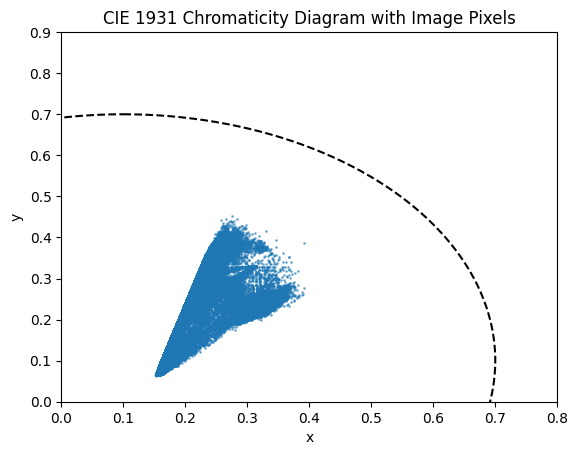

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def rgb_to_xyz(rgb):
    rgb = rgb / 255.0  
    rgb = np.where(rgb > 0.04045, ((rgb + 0.055) / 1.055) ** 2.4, rgb / 12.92)
    M = np.array([[0.4124, 0.3576, 0.1805],
                  [0.2126, 0.7152, 0.0722],
                  [0.0193, 0.1192, 0.9505]])
    xyz = np.dot(rgb, M.T)
    return xyz

def xyz_to_chromaticity(xyz):
    sum_xyz = np.sum(xyz, axis=-1, keepdims=True)
    x = xyz[..., 0] / sum_xyz[..., 0]
    y = xyz[..., 1] / sum_xyz[..., 0]
    return x, y

img = cv2.imread('c:/Users/arunk/Downloads/peppers.png') 

pixels = img.reshape(-1, 3)

xyz = rgb_to_xyz(pixels)
x, y = xyz_to_chromaticity(xyz)

wavelengths = np.linspace(380, 780, 1000)
spectral_x = 0.1 + 0.6 * np.sin(2 * np.pi * (wavelengths - 380) / 400)
spectral_y = 0.1 + 0.6 * np.cos(2 * np.pi * (wavelengths - 380) / 400)
plt.plot(spectral_x, spectral_y, 'k--')  # Boundary

plt.scatter(x, y, s=1, alpha=0.5)
plt.title('CIE 1931 Chromaticity Diagram with Image Pixels')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 0.8)
plt.ylim(0, 0.9)
plt.show()

RGB Mean: [ 57.63351949  66.39706421 120.78080241]
HSV Mean: [102.37188212 157.47073873 122.67490133]
LAB Mean: [ 90.36669413 150.8026886  141.720047  ]


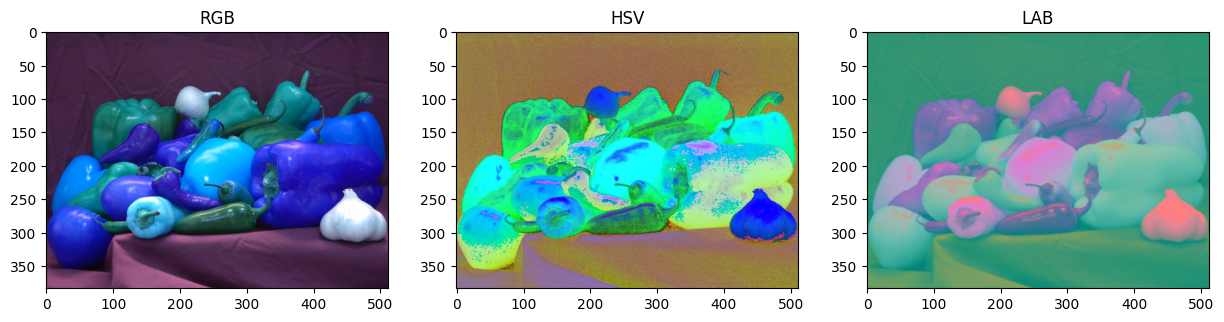

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_rgb = cv2.imread('c:/Users/arunk/Downloads/peppers.png')

img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2LAB)

print("RGB Mean:", np.mean(img_rgb, axis=(0,1)))
print("HSV Mean:", np.mean(img_hsv, axis=(0,1)))
print("LAB Mean:", np.mean(img_lab, axis=(0,1)))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_rgb); axs[0].set_title('RGB')
axs[1].imshow(img_hsv); axs[1].set_title('HSV')
axs[2].imshow(img_lab); axs[2].set_title('LAB')
plt.show()

LAB1: [154 125  97]
LAB2: [148 131 105]


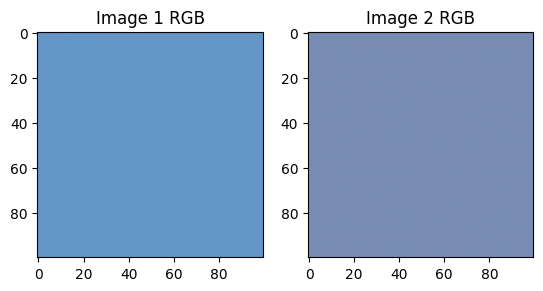

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = np.ones((100, 100, 3)) * [100, 150, 200]  
img2 = np.ones((100, 100, 3)) * [120, 140, 180]  

pixel1 = img1[0:1, 0:1, :].astype(np.uint8)
pixel2 = img2[0:1, 0:1, :].astype(np.uint8)

lab1 = cv2.cvtColor(pixel1, cv2.COLOR_RGB2LAB)[0, 0]  
lab2 = cv2.cvtColor(pixel2, cv2.COLOR_RGB2LAB)[0, 0]  

print("LAB1:", lab1)
print("LAB2:", lab2)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1 / 255); axs[0].set_title('Image 1 RGB')
axs[1].imshow(img2 / 255); axs[1].set_title('Image 2 RGB')
plt.show()

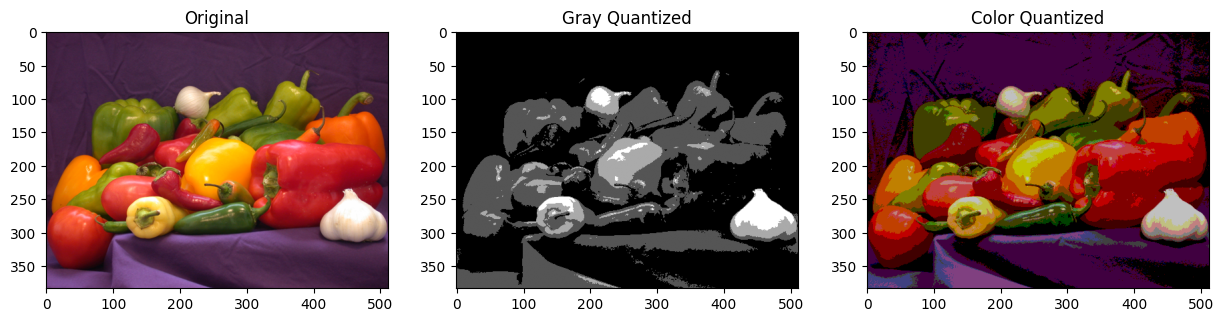

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('c:/Users/arunk/Downloads/peppers.png',cv2.IMREAD_COLOR_RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

levels = 4
gray_quant = (gray // (256 // levels)) * (255 // (levels - 1))

color_quant = (img // 64) * 64 

# Display
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img); axs[0].set_title('Original')
axs[1].imshow(gray_quant, cmap='gray'); axs[1].set_title('Gray Quantized')
axs[2].imshow(color_quant); axs[2].set_title('Color Quantized')
plt.show()

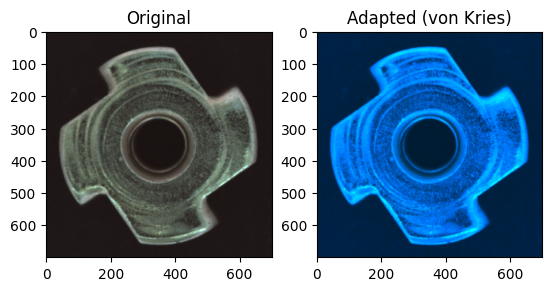

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def von_kries_adaptation(img, src_white, dst_white):
    img_normalized = img / 255.0
    
    M_rgb_to_lms = np.array([[0.4002, 0.7076, -0.0808],
                             [-0.2263, 1.1653, 0.0457],
                             [0.0, 0.0, 0.9182]]).T
    lms_src = np.dot(img_normalized, M_rgb_to_lms.T)
    scale = dst_white / src_white
    scale = scale[np.newaxis, np.newaxis, :]
    
    lms_dst = lms_src * scale
    
    M_lms_to_rgb = np.array([[1.8599, -1.1294, 0.2199],
                             [0.3612, 0.6388, 0.0],
                             [0.0, 0.0, 1.0891]]).T
    adapted = np.dot(lms_dst, M_lms_to_rgb) * 255
    return np.clip(adapted, 0, 255).astype(np.uint8)

img = cv2.imread('c:/Users/arunk/Downloads/mvtec_anomaly_detection/metal_nut/test/good/003.png')

src_white = np.array([1.0985, 1.0, 0.3559])
dst_white = np.array([0.9505, 1.0, 1.0890])

adapted_img = von_kries_adaptation(img, src_white, dst_white)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img); axs[0].set_title('Original')
axs[1].imshow(adapted_img); axs[1].set_title('Adapted (von Kries)')
plt.show()

Short Focal FOV Width: 150.0
Long Focal FOV Width: 158.595


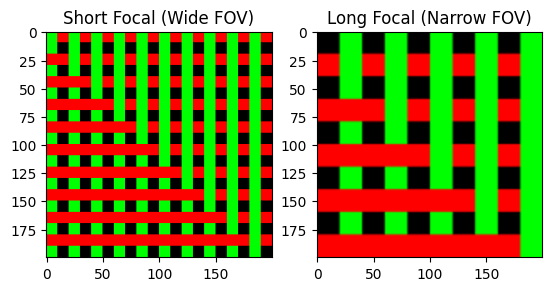

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def create_scene(size=200):
    img = np.zeros((size, size, 3), dtype=np.uint8) 
    for i in range(0, size, 20):
        img[i:i+10, :] = [255, 0, 0]  
        img[:, i:i+10] = [0, 255, 0]  
    return img

def simulate_fov(img, factor):
    crop_size = int(img.shape[0] / factor)
    start = (img.shape[0] - crop_size) // 2
    cropped = img[start:start+crop_size, start:start+crop_size].astype(np.float32) / 255.0 
    resized = np.array(Image.fromarray((cropped * 255).astype(np.uint8)).resize((200, 200)))
    return resized

scene = create_scene()

img_short_focal = simulate_fov(scene, 1.0)  # Wide FOV
img_long_focal = simulate_fov(scene, 2.0)   # Narrow FOV

print("Short Focal FOV Width:", np.sum(np.any(img_short_focal > 0, axis=2)) / 200)
print("Long Focal FOV Width:", np.sum(np.any(img_long_focal > 0, axis=2)) / 200)

# Display
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_short_focal); axs[0].set_title('Short Focal (Wide FOV)')
axs[1].imshow(img_long_focal); axs[1].set_title('Long Focal (Narrow FOV)')
plt.show()

Pixel Resolution (mm/pixel): 0.2
Estimated DOF (mm): 24.639999999999997


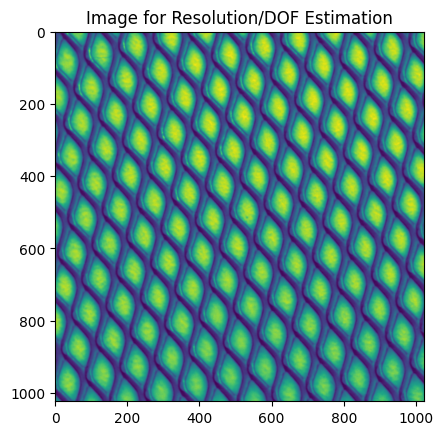

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('c:/Users/arunk/Downloads/mvtec_anomaly_detection/grid/test/good/003.png')

physical_width_cm = 10.0
pixel_width = 500.0  

resolution_mm_per_pixel = (physical_width_cm * 10) / pixel_width
print("Pixel Resolution (mm/pixel):", resolution_mm_per_pixel)

aperture_N = 5.6  
circle_confusion = 0.02  
magnification = 0.1  
dof_mm = 2 * aperture_N * circle_confusion * (magnification + 1) / (magnification ** 2)
print("Estimated DOF (mm):", dof_mm)

# Display image
plt.imshow(img)
plt.title('Image for Resolution/DOF Estimation')
plt.show()

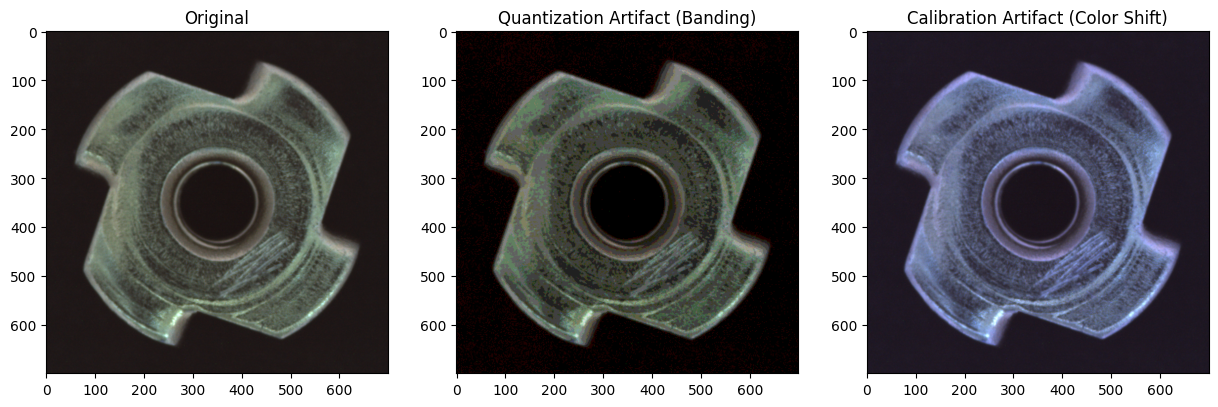

Analysis: Quantization causes visible steps/bands; calibration shifts colors unnaturally.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('c:/Users/arunk/Downloads/mvtec_anomaly_detection/metal_nut/test/scratch/000.png')

quant_art = (img // 32) * 32

calib_art = img.copy()
calib_art[..., 2] = np.clip(calib_art[..., 2] * 1.5, 0, 255)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img); axs[0].set_title('Original')
axs[1].imshow(quant_art); axs[1].set_title('Quantization Artifact (Banding)')
axs[2].imshow(calib_art); axs[2].set_title('Calibration Artifact (Color Shift)')
plt.show()

print("Analysis: Quantization causes visible steps/bands; calibration shifts colors unnaturally.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..292.80150753768845].


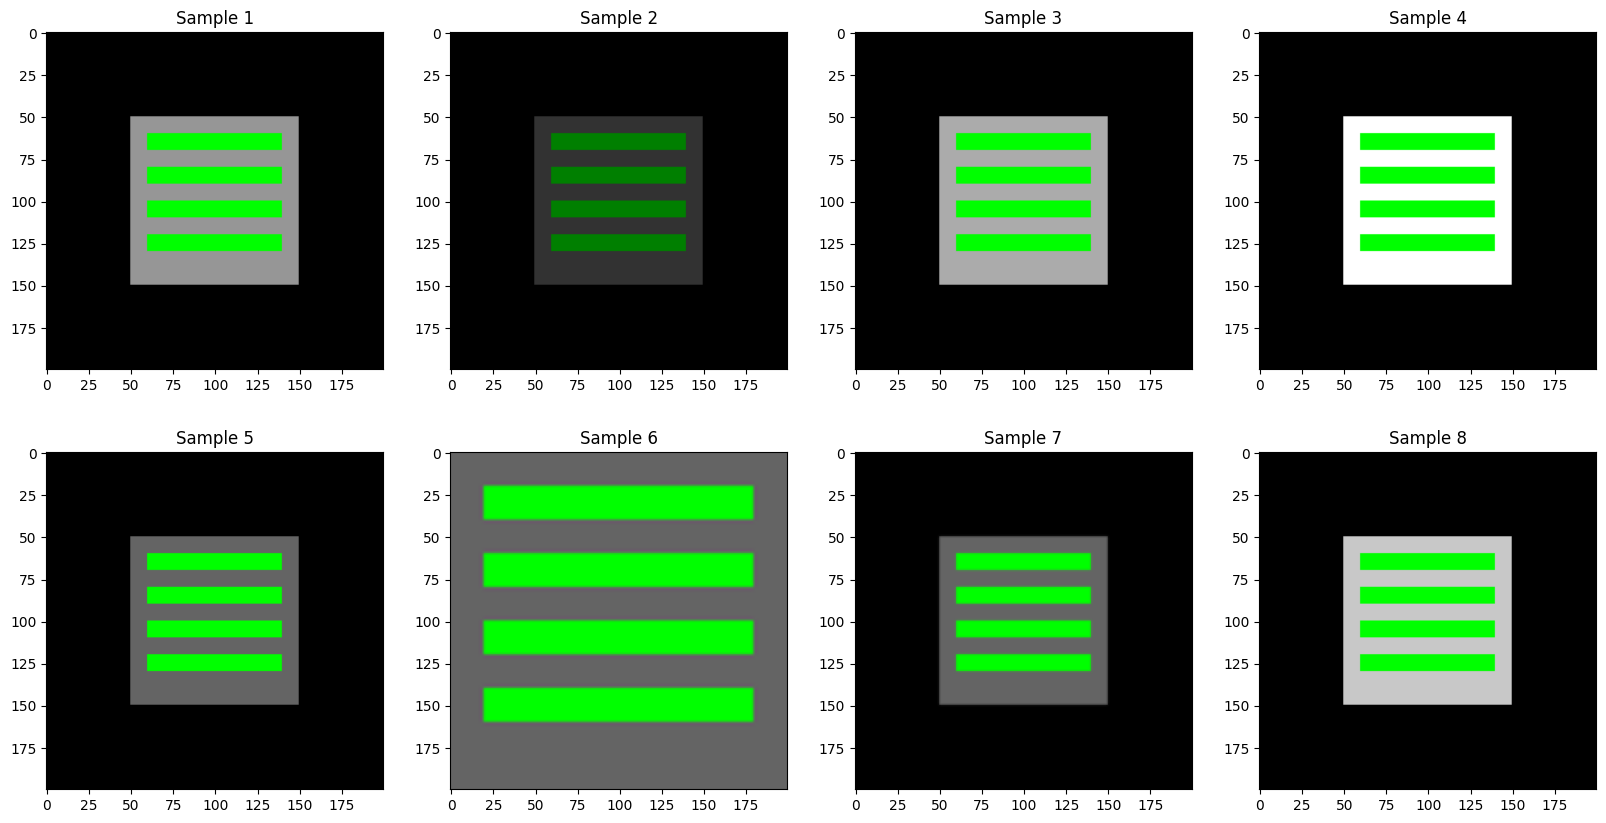

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance 

def create_pcb_image(size=200):
    img = np.zeros((size, size, 3), dtype=np.uint8)
    img[50:150, 50:150] = [100, 100, 100] 
    for i in range(60, 140, 20):
        img[i:i+10, 60:140] = [0, 255, 0]  
    return Image.fromarray(img)

base_img = create_pcb_image()

bright = ImageEnhance.Brightness(base_img).enhance(1.5)
dim = ImageEnhance.Brightness(base_img).enhance(0.5)
directional = ImageEnhance.Contrast(base_img).enhance(2.0)  
uneven = base_img.copy(); uneven = np.array(uneven) * np.linspace(0.5, 1.5, 200)[:, np.newaxis, np.newaxis]

wide_focal = np.array(base_img)  # Wide
narrow_focal = np.array(base_img)[50:150, 50:150]; narrow_focal = np.array(Image.fromarray(narrow_focal).resize((200, 200)))
low_aperture = ImageEnhance.Sharpness(base_img).enhance(0.5) 
high_exposure = ImageEnhance.Brightness(base_img).enhance(2.0)

dataset = [bright, dim, directional, uneven, wide_focal, narrow_focal, low_aperture, high_exposure]
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(dataset[i])
    ax.set_title(f'Sample {i+1}')
plt.show()